['/rds/general/user/cwc4217/home/SHARPy_260422/sharpy/tests/xbeam', '/rds/general/user/cwc4217/home/anaconda3/envs/sharpy_env_xbeamdev/lib/python37.zip', '/rds/general/user/cwc4217/home/anaconda3/envs/sharpy_env_xbeamdev/lib/python3.7', '/rds/general/user/cwc4217/home/anaconda3/envs/sharpy_env_xbeamdev/lib/python3.7/lib-dynload', '', '/rds/general/user/cwc4217/home/anaconda3/envs/sharpy_env_xbeamdev/lib/python3.7/site-packages', '/rds/general/user/cwc4217/home/anaconda3/envs/sharpy_env_xbeamdev/lib/python3.7/site-packages/IPython/extensions', '/rds/general/user/cwc4217/home/.ipython', '/rds/general/user/cwc4217/home/SHARPy_260422/sharpy/']
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'


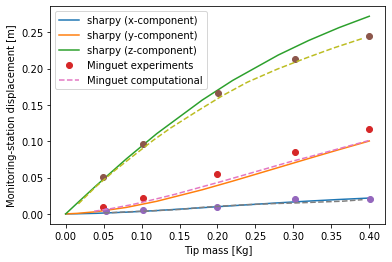

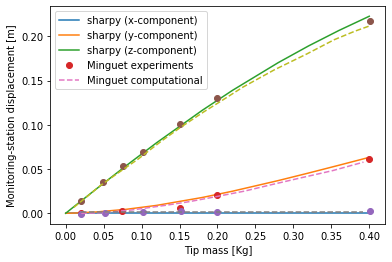

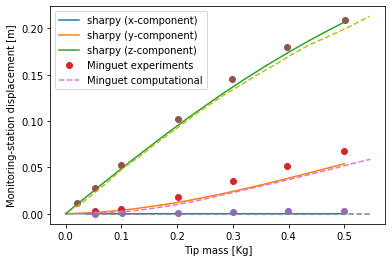

In [1]:
# for minguet_loadramping
"""
Test case of the paper:
Experiments and analysis for composite blades under large deflections. I - Static behavior
Pierre Minguet and John Dugundji
"""

import numpy as np
import os
import pdb
from enum import Enum
import sys
# sys.path.clear()
sys.path.append('/rds/general/user/cwc4217/home/SHARPy_260422/sharpy/')
print(sys.path)

# !/bin/bash
!source ~/SHARPy_260422/sharpy/bin/sharpy_vars.sh
!export sharpy_vars

# print os.environ["sharpy_vars"]

import sharpy.sharpy_main # used to run SHARPy from Jupyter
# import cases.models_generator.gen_main as gm
import sharpy.utils.algebra as algebra
import sharpy.utils.sharpydir as sharpydir

print(sharpydir.SharpyDir)


def read_minguet():

    list_materials =  ['c450', 'c090', 'c2070']
    minguet_res = Enum('minguet', list_materials)
    for ci in list_materials:
        d1 = dict(); d1ex = dict()
        for xi in ['u', 'v', 'w']:
            path = sharpydir.SharpyDir + '/tests/xbeam/minguet_data/%s_%s.dat'%(ci, xi)
            pathex = sharpydir.SharpyDir + '/tests/xbeam/minguet_data/%sex_%s.dat'%(ci, xi)
            d1[xi] = np.genfromtxt(path,skip_header=1).T
            d1ex[xi] = np.genfromtxt(pathex,skip_header=1).T
            
        setattr(getattr(minguet_res, ci), 'comp', d1)
        setattr(getattr(minguet_res, ci), 'experiment', d1ex)
    return minguet_res

def read_sharpy(label):

    dir1 = sharpydir.SharpyDir+ '/tests/xbeam/minguet_'+label
    pos_data = []
    for i in range(len(lumped_m)):
        write_vars_dir = (dir1+'/minguet_'+label+'_%s'%i+
                          '/minguet_'+label+'_'+'/WriteVariablesTime')
        pos_data_i = np.atleast_2d(np.genfromtxt(write_vars_dir + '/struct_pos_node%s.dat'%(55), usecols=[1,2,3]))
        pos_data.append(pos_data_i)

    return pos_data

def plot_results(pos, minguet=None, label=None):

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    p0 =  pos[0][0]# [0., 510e-3, 0.]#
    len_y = len(lumped_m)
    x = [i[0] for i in lumped_m[0:]]
    y_0 = [abs(pos[i][0][0]- p0[0]) for i in range(0, len_y)]
    y_1 = [abs(pos[i][0][1]- p0[1]) for i in range(0, len_y)]
    y_2 = [abs(pos[i][0][2]- p0[2]) for i in range(0, len_y)]
    ax.plot(x, y_0, label='sharpy (x-component)')
    ax.plot(x, y_1, label='sharpy (y-component)')
    ax.plot(x, y_2, label='sharpy (z-component)')
    if minguet is not None:
        res = getattr(minguet, label)
        ax.plot(1e-3*np.array(res.experiment['u'][0]),
                1e-3*np.array(res.experiment['u'][1]), 'o', label='Minguet experiments')
        ax.plot(1e-3*np.array(res.experiment['v'][0]),
                1e-3*np.array(res.experiment['v'][1]), 'o')
        ax.plot(1e-3*np.array(res.experiment['w'][0]),
                1e-3*np.array(res.experiment['w'][1]), 'o')
        ax.plot(1e-3*np.array(res.comp['u'][0]),
                1e-3*np.array(res.comp['u'][1]), '--', label='Minguet computational')
        ax.plot(1e-3*np.array(res.comp['v'][0]),
                1e-3*np.array(res.comp['v'][1]), '--')
        ax.plot(1e-3*np.array(res.comp['w'][0]),
                1e-3*np.array(res.comp['w'][1]), '--')
    ax.set_xlabel('Tip mass [Kg]')
    ax.set_ylabel('Monitoring-station displacement [m]')
#     plt.ylim((0,0.25))
    #plt.ion()
    plt.legend()
    plt.show()

num_nodes = 52
#success_loads = [0, 20, 61, 75, 109, 121, 134, 159, 171, 200] # tip loads for analysis (g) 
success_loads = [0, 15., 40., 80., 120., 180., 220., 280., 320., 360., 400.]
#success_loads = [0, 400.]
lumped_m = [[i*1e-3] for i in success_loads]
label=['c450',
       'c090']
# label=['c450']

pos = dict()
minguet_res = read_minguet()
for label_i in label:

    pos[label_i] = read_sharpy(label_i)
    plot_results(pos[label_i], minguet=minguet_res, label=label_i)

success_loads = [0, 15., 40., 80., 120., 180., 220., 280., 320., 360., 400., 435, 470, 500]
#success_loads = [0, 400.]
lumped_m = [[i*1e-3] for i in success_loads]
label=['c2070']

pos = dict()
minguet_res = read_minguet()
for label_i in label:

    pos[label_i] = read_sharpy(label_i)
    plot_results(pos[label_i], minguet=minguet_res, label=label_i)

